In [5]:
# what are the steps taht we perform here

# [x] grab the data 
# [] run multiple gauss fits over the date with multiple initialization points 
# [] check what is the result for each run and which one gives the least error
# [] take only 70% of the points 
# [] write the result to the csv

# [] final consolidated table -> made per channel per type of gene

In [33]:
# want to see the images inline
%matplotlib inline

# imports
# general 
import os
import glob
from functools import reduce
import re
import csv as csv
# scientific 
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model, datasets
from scipy.stats import norm, gamma
from scipy.optimize import curve_fit
from scipy import special

import pandas as pd

from sklearn.metrics import mean_squared_error, mean_absolute_error

In [34]:
# simple exp function
def f_x(x, A, b, x_0):
    return A*np.exp(-b*(x - x_0)*(x - x_0))

In [35]:
# simple gamma function
def g_x(x, a, c):
    return x**(a - 1)*np.exp(-x)/special.gamma(a) + c

In [36]:
# function for loading one data-set
def load_data(file_path):
    data = np.loadtxt(file_path, delimiter = '\t', skiprows=1)
    # print(data.shape) 
    # handles some weird cases, e.g. when there is no data in the file
    if (len(data.shape) < 2):
        data = data[None, :]
    if (data.shape[1] == 0):
        I = np.array([0])
    else:
        I = data[:, -1]
    return I

In [37]:
# some folder magic
folder = '/Users/kkolyva/Desktop/n2/'
N2_folder = 'N2-results-2/'
SEA12_folder = 'SEA-12-results/'

In [38]:
# some folder magic 
folder = '/Users/kkolyva/Desktop/resample/2018-04-03-results-radial-symmetry/'
N2_folder = 'N2-results/'
SEA12_folder = 'SEA-12-results/'

In [39]:
# some const params for all graphs
binwidth = 0.01
# graph [xmin, xmax]
xmin = 0
xmax = 2.4

In [40]:
bins = np.arange(min(I), max(I) + binwidth, binwidth)
print(bins)

binned_values, real_bins = np.histogram(I, bins)

real_bins = real_bins[:-1] + (real_bins[1] - real_bins[0])/2  
real_bins, binned_values

[ 0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19
  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31
  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43
  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55
  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67
  0.68  0.69  0.7   0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79
  0.8   0.81  0.82  0.83  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91
  0.92  0.93  0.94  0.95  0.96  0.97  0.98  0.99  1.    1.01  1.02  1.03
  1.04  1.05  1.06  1.07  1.08  1.09  1.1   1.11  1.12  1.13  1.14  1.15
  1.16  1.17  1.18  1.19  1.2   1.21  1.22  1.23  1.24  1.25  1.26  1.27
  1.28  1.29  1.3   1.31  1.32  1.33  1.34  1.35  1.36  1.37  1.38  1.39
  1.4   1.41  1.42  1.43  1.44  1.45  1.46  1.47  1.48  1.49  1.5   1.51
  1.52  1.53  1.54  1.55  1.56  1.57  1.58  1.59  1.6   1.61  1.62  1.63
  1.64  1.65  1.66  1.67  1.68  1.69  1.7   1.71  1

(array([ 0.085,  0.095,  0.105,  0.115,  0.125,  0.135,  0.145,  0.155,
         0.165,  0.175,  0.185,  0.195,  0.205,  0.215,  0.225,  0.235,
         0.245,  0.255,  0.265,  0.275,  0.285,  0.295,  0.305,  0.315,
         0.325,  0.335,  0.345,  0.355,  0.365,  0.375,  0.385,  0.395,
         0.405,  0.415,  0.425,  0.435,  0.445,  0.455,  0.465,  0.475,
         0.485,  0.495,  0.505,  0.515,  0.525,  0.535,  0.545,  0.555,
         0.565,  0.575,  0.585,  0.595,  0.605,  0.615,  0.625,  0.635,
         0.645,  0.655,  0.665,  0.675,  0.685,  0.695,  0.705,  0.715,
         0.725,  0.735,  0.745,  0.755,  0.765,  0.775,  0.785,  0.795,
         0.805,  0.815,  0.825,  0.835,  0.845,  0.855,  0.865,  0.875,
         0.885,  0.895,  0.905,  0.915,  0.925,  0.935,  0.945,  0.955,
         0.965,  0.975,  0.985,  0.995,  1.005,  1.015,  1.025,  1.035,
         1.045,  1.055,  1.065,  1.075,  1.085,  1.095,  1.105,  1.115,
         1.125,  1.135,  1.145,  1.155,  1.165,  1.175,  1.185, 

In [41]:
# investigate the data a little bit
print ('bins: ', bins.shape, bins)
print(x1) # < (centers of the bins)
print(y1)
# print ('I:', I.shape, I)


bins:  (284,) [ 0.08  0.09  0.1   0.11  0.12  0.13  0.14  0.15  0.16  0.17  0.18  0.19
  0.2   0.21  0.22  0.23  0.24  0.25  0.26  0.27  0.28  0.29  0.3   0.31
  0.32  0.33  0.34  0.35  0.36  0.37  0.38  0.39  0.4   0.41  0.42  0.43
  0.44  0.45  0.46  0.47  0.48  0.49  0.5   0.51  0.52  0.53  0.54  0.55
  0.56  0.57  0.58  0.59  0.6   0.61  0.62  0.63  0.64  0.65  0.66  0.67
  0.68  0.69  0.7   0.71  0.72  0.73  0.74  0.75  0.76  0.77  0.78  0.79
  0.8   0.81  0.82  0.83  0.84  0.85  0.86  0.87  0.88  0.89  0.9   0.91
  0.92  0.93  0.94  0.95  0.96  0.97  0.98  0.99  1.    1.01  1.02  1.03
  1.04  1.05  1.06  1.07  1.08  1.09  1.1   1.11  1.12  1.13  1.14  1.15
  1.16  1.17  1.18  1.19  1.2   1.21  1.22  1.23  1.24  1.25  1.26  1.27
  1.28  1.29  1.3   1.31  1.32  1.33  1.34  1.35  1.36  1.37  1.38  1.39
  1.4   1.41  1.42  1.43  1.44  1.45  1.46  1.47  1.48  1.49  1.5   1.51
  1.52  1.53  1.54  1.55  1.56  1.57  1.58  1.59  1.6   1.61  1.62  1.63
  1.64  1.65  1.66  1.67  1.68  1.69 

NameError: name 'x1' is not defined

In [42]:
bins = np.arange(min(I), max(I) + binwidth, binwidth)
# print(bins)

x = x1 
y = y1

print ('x:', x)
print ('y:', y)

popt, pcov = curve_fit(f_x, x, y, p0=[40, 2, 0.2])
print(popt)

# plt.bar(x, y, width=0.005, color='pink');
# plt.plot(x,y, color='red')

xx = np.linspace(0, 20, 2000)

plt.plot(xx, f_x(xx, *popt))
# plt.plot()

plt.show()
# f_x(x, *popt);

NameError: name 'x1' is not defined

In [43]:
# for testing 
# filepath = folder + N2_folder + 'all/C1-N2_16.csv'
filepath = '/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-05-02-13-33-11-median-median-first-test/csv-2/C1-N2_96.csv'
# filepath = "/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_237.csv"


I = load_data(filepath)

fig = plt.figure(figsize=(8,5))
title = "Testing the Gauss fit"
fig.suptitle(title, fontsize=14, fontweight='bold')
    
plt.xlabel('Intensity', fontsize=18)
plt.ylabel('# spots', fontsize=16)

print("I_min:", min(I), "I_max:", max(I))

bins = np.arange(min(I), max(I) + binwidth, binwidth)
# bins = np.arange(xmin, xmax, binwidth)

print(bins)

I_res = I
# (h_mu, h_sigma) = norm.fit(I_res)
fit_alpha, fit_loc, fit_beta = gamma.fit(I_res)
print(fit_alpha, fit_loc, fit_beta)

plt.hist(I, bins=bins, color='pink', normed=True); # 
plt.text(0.9, 0.1, "Total: " + str(I.shape[0]), color='black', bbox=dict(facecolor='white', alpha=1))

x = np.linspace(xmin, xmax, 1103)
# y = norm.pdf(x, h_mu, h_sigma)
y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)
plt.plot(x,y)

plt.xlim([xmin, xmax])

plt.legend(loc = 'upper right')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-05-02-13-33-11-median-median-first-test/csv-2/C1-N2_96.csv'

In [44]:
# possible labels 
stain = ['DPY-23_EX', 'WDR-5.2', 'MDH-1']
stage = 'E' # only embryos
comment = '' # only empty ones

In [45]:
# important indices
stain_columns = ['C0_stain', 'C1_stain', 'C2_stain', 'C3_stain', 'C4_stain']
type_columns = ['C0_type', 'C1_type', 'C2_type', 'C3_type', 'C4_type']
stain_prefix = np.array([['C1-', 'C2-', 'C3-', 'C4-', 'C5-']])
ext = '.csv'
filename_column = 'new filename'

In [46]:
# read the db and parse images that we want to process
df = pd.read_csv(folder + "smFISH-database/N2-Table 1.csv", sep=',', na_values=['']);
df.head()

,Line,ID,C0_lambda,C0_stain,C0_type,C1_lambda,C1_stain,C1_type,C2_lambda,C2_stain,...,C4_lambda,C4_stain,C4_type,signal,Integrity,stage,comment,date,original filename,new filename
0,N2,1,670.0,FISH,DPY-23_EX,488.0,AF,NaN,405.0,NUCLEAR,...,NaN,NaN,NaN,3.0,0.0,L1,not complete,11/17/16,2016-11-17_N2-DPY-23-001.nd2,N2_1
1,N2,2,670.0,FISH,DPY-23_EX,488.0,AF,NaN,405.0,NUCLEAR,...,NaN,NaN,NaN,4.0,1.0,L1,dirt,11/17/16,2016-11-17_N2-DPY-23-002.nd2,N2_2
2,N2,3,670.0,FISH,DPY-23_EX,488.0,AF,NaN,405.0,NUCLEAR,...,NaN,NaN,NaN,2.0,0.0,L1,"dirt, not complete",11/17/16,2016-11-17_N2-DPY-23-003.nd2,N2_3
3,N2,4,670.0,FISH,DPY-23_EX,488.0,AF,NaN,405.0,NUCLEAR,...,NaN,NaN,NaN,4.0,1.0,L1,NaN,11/17/16,2016-11-17_N2-DPY-23-004.nd2,N2_4
4,N2,5,670.0,FISH,DPY-23_EX,488.0,AF,NaN,405.0,NUCLEAR,...,NaN,NaN,NaN,3.0,0.0,L1,not complete,11/17/16,2016-11-17_N2-DPY-23-005.nd2,N2_5


In [47]:
# this is general
# filter to have only *good* and *embryo* files
good_indices = np.logical_and((df['stage'] == stage).tolist() , (df['comment'].isnull()).tolist())
good_indices.shape[0]


print(np.sum(good_indices == True))

108


In [48]:
# choose necessary stains
dataset1 = []
df_good = (df[type_columns].astype(np.object) == stain[0]).loc[good_indices, :]
row, col = np.where(df_good)
n_samples = df.shape[0]
new_prefix = np.repeat(stain_prefix, n_samples, axis=0)[row, col]
new_filename = df[filename_column].loc[good_indices].as_matrix()[row]
dataset1 = ["{}{}".format(a_, b_) for a_, b_ in zip(new_prefix, new_filename)]

In [49]:
# choose necessary stains
dataset2 = []
df_good = (df[type_columns].astype(np.object) == stain[1]).loc[good_indices, :]
row, col = np.where(df_good)
n_samples = df.shape[0]
new_prefix = np.repeat(stain_prefix, n_samples, axis=0)[row, col]
new_filename = df[filename_column].loc[good_indices].as_matrix()[row]
dataset2 = ["{}{}".format(a_, b_) for a_, b_ in zip(new_prefix, new_filename)]

In [50]:
# choose necessary stains
dataset3 = []
df_good = (df[type_columns].astype(np.object) == stain[2]).loc[good_indices, :]
row, col = np.where(df_good)
n_samples = df.shape[0]
new_prefix = np.repeat(stain_prefix, n_samples, axis=0)[row, col]
new_filename = df[filename_column].loc[good_indices].as_matrix()[row]
dataset3 = ["{}{}".format(a_, b_) for a_, b_ in zip(new_prefix, new_filename)]

In [51]:
print(len(dataset1) + len(dataset2) + len(dataset3))

225


In [52]:
def create_title(path):
    # get the name of the initial image
    image_name = path.split("/")[8] # was 8
    # create the full title 
    title = image_name[:-4]
    return title

In [71]:
# some presets for the graphs
labels = ['MDH-1'] # ['DPY-23_EX', 'WDR-5.2', 'MDH-1']
colors = ["#0000ee"] # yellow

In [72]:
# have to perform this step multiple times and choose the best one 
# perform n_fits with different initial parameters
# n_fits = 10

# actual plotting 
dataset = []

for j in range(0, len(dataset3)):
    tmp_folder = "/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/"
    tmp = tmp_folder + dataset3[j] + ".csv"
    # tmp = folder + N2_folder + "all/" + dataset1[j] + ".csv"
    dataset.append(tmp)
    print(tmp)

/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_159.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_167.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_173.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_174.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_176.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_182.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_183.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/csv-2/C2-N2_184.csv
/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/201

In [73]:
# how good is fitter-meter?
def fitter_meter(y, y_hat):
    return [mean_absolute_error(y,y_hat), np.sqrt(mean_squared_error(y,y_hat))]

error: L1, L2 [2.8813471208828019, 5.0435365899033187]
peak center: 0.95


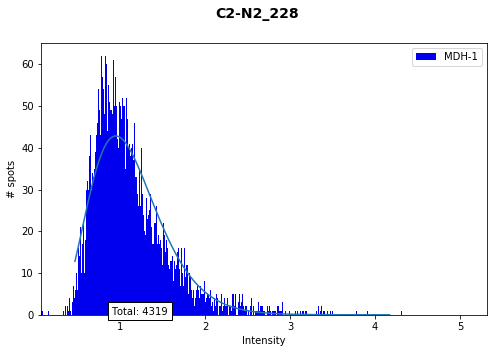

error: L1, L2 [1.1726790640541456, 2.5669205629966525]
peak center: 0.97


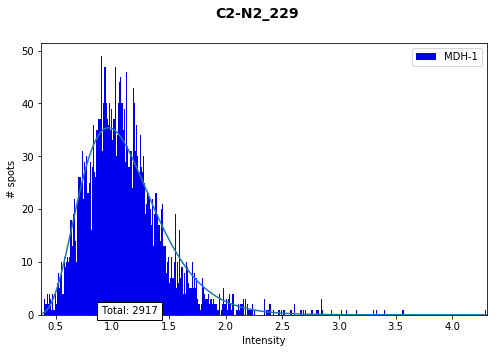

error: L1, L2 [2.1770010860494602, 3.9336098855705668]
peak center: 0.97


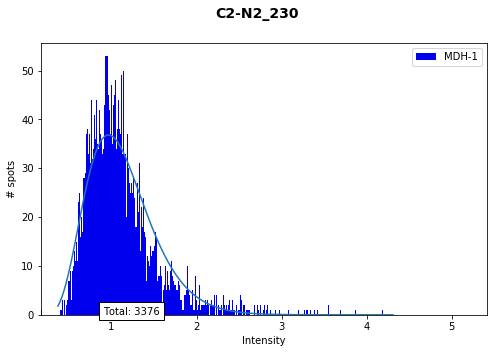

error: L1, L2 [0.72686940263031119, 1.5292335262420491]
peak center: 1.16


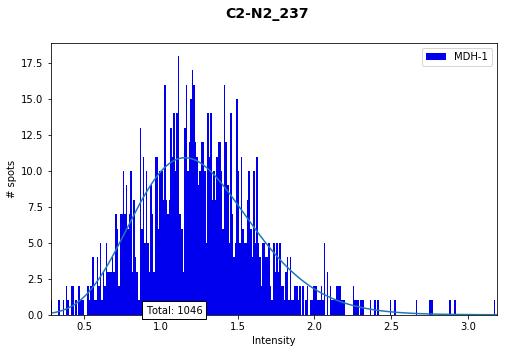

In [74]:
# have to perform this step multiple times and choose the best one 
# perform n_fits with different initial parameters
# n_fits = 10

center_path = "/Users/kkolyva/Desktop/2018-04-18-08-29-25-test/test/2018-04-24-15-33-21-median-median-first-test/centers/all-centers.csv"
# center_path = folder + N2_folder + "centers/all-centers.csv"

center_set = {}

# actual plotting 
for idx in range(0, len(dataset)):
    # feedback
    # print("Processing:", dataset[idx]) 
    
    if(not os.path.exists(dataset[idx])):
        # print("doesn't exist")
        continue
        
    # create the canvas
    fig = plt.figure(figsize=(8,5))
    title = create_title(dataset[idx])

    fig.suptitle(title, fontsize=14, fontweight='bold')
    
    # feedback
    # print("Processing:", dataset[idx]) 
    
    # load the data and scale it accordingly
    I = load_data(dataset[idx])
        
    # TODO: threshold the data 
    # TODO: smoothen the data
    # I_res = running_average_strides(I)
    
    # bins = np.arange(min(I), max(I) + binwidth, (max(I) + binwidth - min(I)) / 100)
    
    I_res = I
    binned_values, real_bins = np.histogram(I, bins)
    use_median = np.median(I_res)
    
    # (h_mu, h_sigma) = norm.fit(I_res)
    fit_alpha, fit_loc, fit_beta = gamma.fit(I_res, loc=use_median/2, scale=1/np.max(binned_values))
    
    factor = np.sum(binned_values*np.diff(real_bins))
             
    # create one of the subplot images
    bins=np.arange(min(I), max(I) + binwidth, binwidth)
    # bins = np.arange(xmin, xmax, binwidth)
    plt.hist(I, bins=bins, color=colors, label=labels, normed=False) # this is the 
    
    # plt.plot(real_bins[:-1], binned_values)
    
    x = np.linspace(xmin, xmax, 1103)
    y = gamma.pdf(x, fit_alpha, fit_loc, fit_beta)*factor
    plt.plot(x,y)
    # binned_values 
    # real_bins
    yhat = gamma.pdf(real_bins, fit_alpha, fit_loc, fit_beta)*factor
    
    if (np.any(np.isnan(yhat))):
        continue
    
    error = fitter_meter(binned_values, yhat[:-1])
    
    # print("yhat :", yhat)
    # print("yreal:", binned_values)
    print("error: L1, L2", error)
    print("peak center:", real_bins[np.argmax(yhat)])
          
    # reasonable adjustments to make the data look nicer
    plt.xlabel('Intensity')
    plt.ylabel('# spots')
    plt.text(0.9, 0.1, "Total: " + str(I.shape[0]), color='black', bbox=dict(facecolor='white', alpha=1))
    
    xmin = min(I)
    xmax = max(I) + binwidth
    
    plt.xlim([xmin, xmax])
    plt.legend(loc = 'upper right')

    # save the peak values for further 
    center_set[title] = real_bins[np.argmax(yhat)]  
#     if not os.path.exists(folder_path + "histograms/" + image):
#         os.makedirs(folder_path + "histograms/" + image)
    plt.savefig(folder + N2_folder + "histograms/" + title + ".png") 
    plt.show()
    # break
# print (center_set)
# df_center = pd.DataFrame(list(center_set.items()), columns=['filename', 'center'])
# if (os.path.exists(center_path)):
#     df_center.to_csv(center_path, index=False, header=False, encoding='utf-8', mode = 'a')
# else:
#     df_center.to_csv(center_path, index=False, header=True, encoding='utf-8', mode = 'w' )
# print (df_center)

### ?plt.hist

In [ ]:
# general setup for pretty images 
full_folder = folder + N2_folder
print (full_folder)

dataset1 = []
for path in glob.iglob(full_folder + "C1/*"):
    dataset1.append(path)
dataset2 = []
for path in glob.iglob(full_folder + "C2/*"):
    dataset2.append(path)
dataset3 = []
for path in glob.iglob(full_folder + "C3/*"):
    dataset2.append(path)
    
# print(dataset)